In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
import os
import shutil
import re
import time
import pickle
import pdb
import sys
import pandas as pd
import seaborn as sns
import random
sns.set()

In [2]:
def reading_in_data(filename):
    
    filename = str(filename)

    infile = open(filename,'rb')
    new_dict = pickle.load(infile)
    infile.close()
    
    return new_dict



def creating_SN_data(data_dict):
    
    high_noise = []
    high_flux = []
    high_wave = []
    high_class = []
    high_redshift = []
    high_eboss_tgt = []
    
    low_noise = []
    low_flux = []
    low_wave = []
    low_class = []
    low_redshift = []
    low_eboss_tgt = []
    
    for i in range(len(data_dict['CLASS'])):
        
        if data_dict['NOISE'][i]  >= 12.:
            
            high_noise.append(data_dict['NOISE'][i])
            high_flux.append(data_dict['FLUX'][i])
            high_wave.append(data_dict['WAVE'][i])
            high_class.append(data_dict['CLASS'][i])
            high_redshift.append(data_dict['REDSHIFT'][i])
            #high_eboss_tgt.append(data_dict['EBOSS_TARGET1'][i])
            
        elif data_dict['NOISE'][i] <= 2.:
            
            low_noise.append(data_dict['NOISE'][i])
            low_flux.append(data_dict['FLUX'][i])
            low_wave.append(data_dict['WAVE'][i])
            low_class.append(data_dict['CLASS'][i])
            low_redshift.append(data_dict['REDSHIFT'][i])
            #low_eboss_tgt.append(data_dict['EBOSS_TARGET1'][i])
            
    
    high_SN_dict = {'NOISE': high_noise, 'FLUX': high_flux, 'WAVE': high_wave, 'CLASS': high_class,\
                   'REDSHIFT': high_redshift, 'EBOSS_TARGET1': high_eboss_tgt}
    
    low_SN_dict = {'NOISE': low_noise, 'FLUX': low_flux, 'WAVE': low_wave, 'CLASS': low_class,\
                  'REDSHIFT': low_redshift, 'EBOSS_TARGET1': low_eboss_tgt}
    
    SN_dict = {'HIGH': high_SN_dict, 'LOW': low_SN_dict}
    
    return SN_dict



def binning_data(data_dict, bin_num):
    
    lists = [[] for i in range(bin_num*(len(data_dict.keys()) -1))]
    
        
    for i in range(len(data_dict['REDSHIFT'])):
        
        if (data_dict['REDSHIFT'][i] >= 2.45) & (data_dict['REDSHIFT'][i] < 2.50):
        
            lists[0].append(data_dict['REDSHIFT'][i])
            lists[1].append(data_dict['CLASS'][i])
            lists[2].append(data_dict['WAVE'][i])
            lists[3].append(data_dict['FLUX'][i])
            lists[4].append(data_dict['NOISE'][i])
            
        elif (data_dict['REDSHIFT'][i] >= 2.50) & (data_dict['REDSHIFT'][i] < 2.55):
        
            lists[5].append(data_dict['REDSHIFT'][i])
            lists[6].append(data_dict['CLASS'][i])
            lists[7].append(data_dict['WAVE'][i])
            lists[8].append(data_dict['FLUX'][i])
            lists[9].append(data_dict['NOISE'][i])
    
        elif (data_dict['REDSHIFT'][i] >= 2.55) & (data_dict['REDSHIFT'][i] < 2.60):
        
            lists[10].append(data_dict['REDSHIFT'][i])
            lists[11].append(data_dict['CLASS'][i])
            lists[12].append(data_dict['WAVE'][i])
            lists[13].append(data_dict['FLUX'][i])
            lists[14].append(data_dict['NOISE'][i])
        
        elif (data_dict['REDSHIFT'][i] >= 2.60) & (data_dict['REDSHIFT'][i] < 2.65):
        
            lists[15].append(data_dict['REDSHIFT'][i])
            lists[16].append(data_dict['CLASS'][i])
            lists[17].append(data_dict['WAVE'][i])
            lists[18].append(data_dict['FLUX'][i])
            lists[19].append(data_dict['NOISE'][i])
        
        elif (data_dict['REDSHIFT'][i] >= 2.65) & (data_dict['REDSHIFT'][i] < 2.70):
        
            lists[20].append(data_dict['REDSHIFT'][i])
            lists[21].append(data_dict['CLASS'][i])
            lists[22].append(data_dict['WAVE'][i])
            lists[23].append(data_dict['FLUX'][i])
            lists[24].append(data_dict['NOISE'][i])
            
        elif (data_dict['REDSHIFT'][i] >= 2.70) & (data_dict['REDSHIFT'][i] < 2.75):

            lists[25].append(data_dict['REDSHIFT'][i])
            lists[26].append(data_dict['CLASS'][i])
            lists[27].append(data_dict['WAVE'][i])
            lists[28].append(data_dict['FLUX'][i])
            lists[29].append(data_dict['NOISE'][i])
        
        elif (data_dict['REDSHIFT'][i] >= 2.75) & (data_dict['REDSHIFT'][i] < 2.80):
        
            lists[30].append(data_dict['REDSHIFT'][i])
            lists[31].append(data_dict['CLASS'][i])
            lists[32].append(data_dict['WAVE'][i])
            lists[33].append(data_dict['FLUX'][i])
            lists[34].append(data_dict['NOISE'][i])
            
    
        elif (data_dict['REDSHIFT'][i] >= 2.80) & (data_dict['REDSHIFT'][i] < 2.85):
        
            lists[35].append(data_dict['REDSHIFT'][i])
            lists[36].append(data_dict['CLASS'][i])
            lists[37].append(data_dict['WAVE'][i])
            lists[38].append(data_dict['FLUX'][i])
            lists[39].append(data_dict['NOISE'][i])
        
        elif (data_dict['REDSHIFT'][i] >= 2.85) & (data_dict['REDSHIFT'][i] < 2.90):
        
            lists[40].append(data_dict['REDSHIFT'][i])
            lists[41].append(data_dict['CLASS'][i])
            lists[42].append(data_dict['WAVE'][i])
            lists[43].append(data_dict['FLUX'][i])
            lists[44].append(data_dict['NOISE'][i])
        
        elif (data_dict['REDSHIFT'][i] >= 2.90) & (data_dict['REDSHIFT'][i] < 2.95):
        
            lists[45].append(data_dict['REDSHIFT'][i])
            lists[46].append(data_dict['CLASS'][i])
            lists[47].append(data_dict['WAVE'][i])
            lists[48].append(data_dict['FLUX'][i])
            lists[49].append(data_dict['NOISE'][i])
        
        elif (data_dict['REDSHIFT'][i] >= 2.95) & (data_dict['REDSHIFT'][i] < 3.0):

            lists[50].append(data_dict['REDSHIFT'][i])
            lists[51].append(data_dict['CLASS'][i])
            lists[52].append(data_dict['WAVE'][i])
            lists[53].append(data_dict['FLUX'][i])
            lists[54].append(data_dict['NOISE'][i])
        
        elif (data_dict['REDSHIFT'][i] >= 3.0) & (data_dict['REDSHIFT'][i] < 3.05):
        
            lists[55].append(data_dict['REDSHIFT'][i])
            lists[56].append(data_dict['CLASS'][i])
            lists[57].append(data_dict['WAVE'][i])
            lists[58].append(data_dict['FLUX'][i])
            lists[59].append(data_dict['NOISE'][i])
            
        else:
            pass
            
    return lists


def balancing_redshifts(binned_lists1, binned_lists2):
                                                             
    # this function is making sure there are the same number of quasars in each redshift bin
    # it randomizes the high SN quasars bc there's more of them so that there's no redshift ordering in them
    # binned_dict2 is the place of the high SN quasars, so its len will always be larger than the variable quasars
     
    redshift1 = binned_lists1[0] + binned_lists1[5] + binned_lists1[10] + binned_lists1[15] +\
                binned_lists1[20] + binned_lists1[25] + binned_lists1[30] + binned_lists1[35] +\
                binned_lists1[40] + binned_lists1[45] + binned_lists1[50] + binned_lists1[55]
    
    class1 = binned_lists1[1] + binned_lists1[6] + binned_lists1[11] + binned_lists1[16] +\
             binned_lists1[21] + binned_lists1[26] + binned_lists1[31] + binned_lists1[36] +\
             binned_lists1[41] + binned_lists1[46] + binned_lists1[51] + binned_lists1[56]
    
    wave1 = binned_lists1[2] + binned_lists1[7] + binned_lists1[12] + binned_lists1[17] +\
            binned_lists1[22] + binned_lists1[27] + binned_lists1[32] + binned_lists1[37] +\
            binned_lists1[42] + binned_lists1[47] + binned_lists1[52] + binned_lists1[57]
    
    flux1 = binned_lists1[3] + binned_lists1[8] + binned_lists1[13] + binned_lists1[18] +\
           binned_lists1[23] + binned_lists1[28] + binned_lists1[33] + binned_lists1[38] +\
           binned_lists1[43] + binned_lists1[48] + binned_lists1[53] + binned_lists1[58]
    
    noise1 = binned_lists1[4] + binned_lists1[9] + binned_lists1[14] + binned_lists1[19] +\
            binned_lists1[24] + binned_lists1[29] + binned_lists1[34] + binned_lists1[39] +\
            binned_lists1[44] + binned_lists1[49] + binned_lists1[54] + binned_lists1[59]
    
    dict1 = {'REDSHIFT': redshift1, 'CLASS': class1, 'WAVE': wave1,  'FLUX': flux1, 'NOISE': noise1  }
    
    
    
    permutation0 = np.random.permutation(len(binned_lists2[0])) # creates the same permutation to be done on flux & labels

    bl0 = (np.asarray(binned_lists2[0])[permutation0])
    bl1 = (np.asarray(binned_lists2[1])[permutation0])
    bl2 = (np.asarray(binned_lists2[2])[permutation0])
    bl3 = (np.asarray(binned_lists2[3])[permutation0])
    bl4 = (np.asarray(binned_lists2[4])[permutation0])
    
    
    permutation1 = np.random.permutation(len(var_bin[5])) # creates the same permutation to be done on flux & labels

    bl5 = (np.asarray(binned_lists2[5])[permutation1])
    bl6 = (np.asarray(binned_lists2[6])[permutation1])
    bl7 = (np.asarray(binned_lists2[7])[permutation1])
    bl8 = (np.asarray(binned_lists2[8])[permutation1])
    bl9 = (np.asarray(binned_lists2[9])[permutation1])

    
    permutation2 = np.random.permutation(len(var_bin[10])) # creates the same permutation to be done on flux & labels

    bl10 = (np.asarray(binned_lists2[10])[permutation2])
    bl11 = (np.asarray(binned_lists2[11])[permutation2])
    bl12 = (np.asarray(binned_lists2[12])[permutation2])
    bl13 = (np.asarray(binned_lists2[13])[permutation2])
    bl14 = (np.asarray(binned_lists2[14])[permutation2])
    
    
    permutation3 = np.random.permutation(len(var_bin[15])) # creates the same permutation to be done on flux & labels

    bl15 = (np.asarray(binned_lists2[15])[permutation3])
    bl16 = (np.asarray(binned_lists2[16])[permutation3])
    bl17 = (np.asarray(binned_lists2[17])[permutation3])
    bl18 = (np.asarray(binned_lists2[18])[permutation3])
    bl19 = (np.asarray(binned_lists2[19])[permutation3])
    
    
    permutation4 = np.random.permutation(len(var_bin[20])) # creates the same permutation to be done on flux & labels

    bl20 = (np.asarray(binned_lists2[20])[permutation4])
    bl21 = (np.asarray(binned_lists2[21])[permutation4])
    bl22 = (np.asarray(binned_lists2[22])[permutation4])
    bl23 = (np.asarray(binned_lists2[23])[permutation4])
    bl24 = (np.asarray(binned_lists2[24])[permutation4])
    
    
    permutation5 = np.random.permutation(len(var_bin[25])) # creates the same permutation to be done on flux & labels

    bl25 = (np.asarray(binned_lists2[25])[permutation5])
    bl26 = (np.asarray(binned_lists2[26])[permutation5])
    bl27 = (np.asarray(binned_lists2[27])[permutation5])
    bl28 = (np.asarray(binned_lists2[28])[permutation5])
    bl29 = (np.asarray(binned_lists2[29])[permutation5])
    
    
    permutation6 = np.random.permutation(len(var_bin[30])) # creates the same permutation to be done on flux & labels

    bl30 = (np.asarray(binned_lists2[30])[permutation6])
    bl31 = (np.asarray(binned_lists2[31])[permutation6])
    bl32 = (np.asarray(binned_lists2[32])[permutation6])
    bl33 = (np.asarray(binned_lists2[33])[permutation6])
    bl34 = (np.asarray(binned_lists2[34])[permutation6])

    
    permutation7 = np.random.permutation(len(var_bin[35])) # creates the same permutation to be done on flux & labels

    bl35 = (np.asarray(binned_lists2[35])[permutation7])
    bl36 = (np.asarray(binned_lists2[36])[permutation7])
    bl37 = (np.asarray(binned_lists2[37])[permutation7])
    bl38 = (np.asarray(binned_lists2[38])[permutation7])
    bl39 = (np.asarray(binned_lists2[39])[permutation7])

    
    permutation8 = np.random.permutation(len(var_bin[40])) # creates the same permutation to be done on flux & labels

    bl40 = (np.asarray(binned_lists2[40])[permutation8])
    bl41 = (np.asarray(binned_lists2[41])[permutation8])
    bl42 = (np.asarray(binned_lists2[42])[permutation8])
    bl43 = (np.asarray(binned_lists2[43])[permutation8])
    bl44 = (np.asarray(binned_lists2[44])[permutation8])

    
    permutation9 = np.random.permutation(len(var_bin[45])) # creates the same permutation to be done on flux & labels

    bl45 = (np.asarray(binned_lists2[45])[permutation9])
    bl46 = (np.asarray(binned_lists2[46])[permutation9])
    bl47 = (np.asarray(binned_lists2[47])[permutation9])
    bl48 = (np.asarray(binned_lists2[48])[permutation9])
    bl49 = (np.asarray(binned_lists2[49])[permutation9])
    
    
    permutation10 = np.random.permutation(len(var_bin[50])) # creates the same permutation to be done on flux & labels

    bl50 = (np.asarray(binned_lists2[50])[permutation10])
    bl51 = (np.asarray(binned_lists2[51])[permutation10])
    bl52 = (np.asarray(binned_lists2[52])[permutation10])
    bl53 = (np.asarray(binned_lists2[53])[permutation10])
    bl54 = (np.asarray(binned_lists2[54])[permutation10])
    
    
    permutation11 = np.random.permutation(len(var_bin[55])) # creates the same permutation to be done on flux & labels

    bl55 = (np.asarray(binned_lists2[55])[permutation11])
    bl56 = (np.asarray(binned_lists2[56])[permutation11])
    bl57 = (np.asarray(binned_lists2[57])[permutation11])
    bl58 = (np.asarray(binned_lists2[58])[permutation11])
    bl59 = (np.asarray(binned_lists2[59])[permutation11])
    
    
    
    redshift2 = np.concatenate((bl0[:len(binned_lists1[0])], bl5[:len(binned_lists1[5])],\
                bl10[:len(binned_lists1[10])], bl15[:len(binned_lists1[15])], \
                bl20[:len(binned_lists1[20])], bl25[:len(binned_lists1[25])], \
                bl30[:len(binned_lists1[30])], bl35[:len(binned_lists1[35])], \
                bl40[:len(binned_lists1[40])], bl45[:len(binned_lists1[45])], \
                bl50[:len(binned_lists1[50])], bl55[:len(binned_lists1[55])])) 


    
    class2 =    np.concatenate((bl1[:len(binned_lists1[1])], bl6[:len(binned_lists1[6])],\
                bl11[:len(binned_lists1[11])], bl16[:len(binned_lists1[16])], \
                bl21[:len(binned_lists1[21])], bl26[:len(binned_lists1[26])], \
                bl31[:len(binned_lists1[31])], bl36[:len(binned_lists1[36])], \
                bl41[:len(binned_lists1[41])], bl46[:len(binned_lists1[46])], \
                bl51[:len(binned_lists1[51])], bl56[:len(binned_lists1[56])])) 
    
    
  
    wave2 =     np.concatenate((bl2[:len(binned_lists1[2])], bl7[:len(binned_lists1[7])], \
                bl12[:len(binned_lists1[12])], bl17[:len(binned_lists1[17])], \
                bl22[:len(binned_lists1[22])], bl27[:len(binned_lists1[27])], \
                bl32[:len(binned_lists1[32])], bl37[:len(binned_lists1[37])], \
                bl42[:len(binned_lists1[42])], bl47[:len(binned_lists1[47])], \
                bl52[:len(binned_lists1[52])], bl57[:len(binned_lists1[57])])) 
    

    
    flux2 =     np.concatenate((bl3[:len(binned_lists1[3])], bl8[:len(binned_lists1[8])],\
                bl13[:len(binned_lists1[13])], bl18[:len(binned_lists1[18])], \
                bl23[:len(binned_lists1[23])], bl28[:len(binned_lists1[28])], \
                bl33[:len(binned_lists1[33])], bl38[:len(binned_lists1[38])], \
                bl43[:len(binned_lists1[43])], bl48[:len(binned_lists1[48])], \
                bl53[:len(binned_lists1[53])], bl58[:len(binned_lists1[58])])) 
    
    
    
    noise2 =    np.concatenate((bl4[:len(binned_lists1[4])], bl9[:len(binned_lists1[9])],\
                bl14[:len(binned_lists1[14])], bl19[:len(binned_lists1[19])], \
                bl24[:len(binned_lists1[24])], bl29[:len(binned_lists1[29])], \
                bl34[:len(binned_lists1[34])], bl39[:len(binned_lists1[39])], \
                bl44[:len(binned_lists1[44])], bl49[:len(binned_lists1[49])], \
                bl54[:len(binned_lists1[54])], bl59[:len(binned_lists1[59])])) 
    
    dict2 = {'REDSHIFT': redshift2, 'CLASS': class2, 'WAVE': wave2, 'FLUX': flux2, 'NOISE': noise2}
    
    dict_dict = {'VAR': dict1, 'HIGH': dict2}
    
    
    return dict_dict



def SN_data_selection(data_dict1, data_dict2):
    
    dict1 = creating_SN_data(data_dict1)
    dict2 = creating_SN_data(data_dict2)
    
    high_SN1 = dict1['HIGH']
    low_SN1 = dict1['LOW']
    
    high_SN2 = dict2['HIGH']
    low_SN2 = dict2['LOW']
    

    
    if (len(high_SN1['CLASS'])) > (len(high_SN2['CLASS'])):
        
        cut_high_SN1_class = high_SN1['CLASS'][:len(high_SN2['CLASS'])]
        cut_high_SN1_wave = high_SN1['WAVE'][:len(high_SN2['WAVE'])]
        cut_high_SN1_flux = high_SN1['FLUX'][:len(high_SN2['FLUX'])]
        cut_high_SN1_noise = high_SN1['NOISE'][:len(high_SN2['NOISE'])]
        cut_high_SN1_redshift = high_SN1['REDSHIFT'][:len(high_SN2['REDSHIFT'])]
        
        cut_high_SN2_class = high_SN2['CLASS']
        cut_high_SN2_wave = high_SN2['WAVE']
        cut_high_SN2_flux = high_SN2['FLUX']
        cut_high_SN2_noise = high_SN2['NOISE']
        cut_high_SN2_redshift = high_SN2['REDSHIFT']
        
        
    elif (len(high_SN1['CLASS'])) < (len(high_SN2['CLASS'])): 
        
        cut_high_SN1_class = high_SN1['CLASS']
        cut_high_SN1_wave = high_SN1['WAVE']
        cut_high_SN1_flux = high_SN1['FLUX']
        cut_high_SN1_noise = high_SN1['NOISE']
        cut_high_SN1_redshift = high_SN1['REDSHIFT']
        
        cut_high_SN2_class = high_SN2['CLASS'][:len(high_SN1['CLASS'])]
        cut_high_SN2_wave = high_SN2['WAVE'][:len(high_SN1['WAVE'])]
        cut_high_SN2_flux = high_SN2['FLUX'][:len(high_SN1['FLUX'])]
        cut_high_SN2_noise = high_SN2['NOISE'][:len(high_SN1['NOISE'])]
        cut_high_SN2_redshift = high_SN2['REDSHIFT'][:len(high_SN1['REDSHIFT'])]
        
        

    if (len(low_SN1['CLASS'])) > (len(low_SN2['CLASS'])):
        
        cut_low_SN1_class = low_SN1['CLASS'][:len(low_SN2['CLASS'])]
        cut_low_SN1_wave = low_SN1['WAVE'][:len(low_SN2['WAVE'])]
        cut_low_SN1_flux = low_SN1['FLUX'][:len(low_SN2['FLUX'])]
        cut_low_SN1_noise = low_SN1['NOISE'][:len(low_SN2['NOISE'])]
        cut_low_SN1_redshift = low_SN1['REDSHIFT'][:len(low_SN2['REDSHIFT'])]
        
        cut_low_SN2_class = low_SN2['CLASS']
        cut_low_SN2_wave = low_SN2['WAVE']
        cut_low_SN2_flux = low_SN2['FLUX']
        cut_low_SN2_noise = low_SN2['NOISE']
        cut_low_SN2_redshift = low_SN2['REDSHIFT']
        
        
    elif (len(low_SN1['CLASS'])) < (len(low_SN2['CLASS'])): 
        
        cut_low_SN1_class = low_SN1['CLASS']
        cut_low_SN1_wave = low_SN1['WAVE']
        cut_low_SN1_flux = low_SN1['FLUX']
        cut_low_SN1_noise = low_SN1['NOISE']
        cut_low_SN1_redshift = low_SN1['REDSHIFT']
        
        cut_low_SN2_class = low_SN2['CLASS'][:len(low_SN1['CLASS'])]
        cut_low_SN2_wave = low_SN2['WAVE'][:len(low_SN1['WAVE'])]
        cut_low_SN2_flux = low_SN2['FLUX'][:len(low_SN1['FLUX'])]
        cut_low_SN2_noise = low_SN2['NOISE'][:len(low_SN1['NOISE'])]
        cut_low_SN2_redshift = low_SN2['REDSHIFT'][:len(low_SN1['REDSHIFT'])]
        
        
        
    high_SN_class = cut_high_SN1_class + cut_high_SN2_class
    high_SN_wave = cut_high_SN1_wave + cut_high_SN2_wave
    high_SN_flux = cut_high_SN1_flux + cut_high_SN2_flux
    high_SN_noise = cut_high_SN1_noise + cut_high_SN2_noise
    high_SN_redshift = cut_high_SN1_redshift + cut_high_SN2_redshift
    
    
    low_SN_class = cut_low_SN1_class + cut_low_SN2_class
    low_SN_wave = cut_low_SN1_wave + cut_low_SN2_wave
    low_SN_flux = cut_low_SN1_flux + cut_low_SN2_flux
    low_SN_noise = cut_low_SN1_noise + cut_low_SN2_noise
    
    
    low_SN_redshift = cut_low_SN1_redshift + cut_low_SN2_redshift
    
    high_SN_dict = {'CLASS': high_SN_class, 'WAVE': high_SN_wave, 'FLUX': high_SN_flux,\
                   'NOISE': high_SN_noise, 'REDSHIFT': high_SN_redshift}
    
    
    
    low_SN_dict = {'CLASS': low_SN_class, 'WAVE': low_SN_wave, 'FLUX': low_SN_flux,\
                   'NOISE': low_SN_noise, 'REDSHIFT': low_SN_redshift}

    SN_dicts = {'HIGH': high_SN_dict, 'LOW': low_SN_dict}
    
    return SN_dicts


def save_as_pickled_object(obj, filepath):
    """
    This is a defensive way to write pickle.write, allowing for very large files on all platforms
    """
    max_bytes = 2**31 - 1
    bytes_out = pickle.dumps(obj)
    n_bytes = sys.getsizeof(bytes_out)
    with open(filepath, 'wb') as f_out:
        for idx in range(0, n_bytes, max_bytes):
            f_out.write(bytes_out[idx:idx+max_bytes])

In [3]:
star_dict = pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/object_dict/star_dict")
fake_dict = pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/object_dict/fake_dict")
var_dict = pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/object_dict/varqso_dict")
high_SN_quasar_dict = pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/object_dict/high_SN_quasar_dict")

In [4]:
fake_dict.keys()

dict_keys(['FAKE_NOISE', 'NOISE', 'WAVE', 'REDSHIFT', 'FLUX', 'CLASS'])

In [5]:
varSN_dict = creating_SN_data(var_dict)
star_SN_dict = creating_SN_data(star_dict)
high_SN_quasar_SN_dict = creating_SN_data(high_SN_quasar_dict)

In [6]:
var_bin = binning_data(varSN_dict['LOW'], 12)
high_bin = binning_data(high_SN_quasar_SN_dict['HIGH'], 12)

In [7]:
bal_qso_dict = balancing_redshifts(var_bin, high_bin)

In [8]:
var_dict_bal = bal_qso_dict['VAR']
high_dict_bal = bal_qso_dict['HIGH']

In [9]:
var_star_dict = SN_data_selection(var_dict_bal, star_dict)

high_SN_quasar_star_dict = SN_data_selection(high_dict_bal, star_dict)

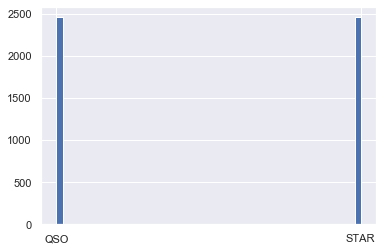

In [10]:
a,b,c = plt.hist(np.asarray(var_star_dict['LOW']['CLASS']), bins = 50)

In [11]:
save_as_pickled_object(var_star_dict,'varstar_dict' )

save_as_pickled_object(high_SN_quasar_star_dict, 'high_SN_quasarstar_dict')

In [12]:
var_star_dict['LOW'].keys()

dict_keys(['CLASS', 'WAVE', 'FLUX', 'NOISE', 'REDSHIFT'])

In [13]:
print(len(var_star_dict['LOW']['CLASS']))
print(len(var_star_dict['LOW']['WAVE'][0]))
print(len(var_star_dict['LOW']['FLUX'][0]))


print(len(high_SN_quasar_star_dict['HIGH']['CLASS']))
print(len(high_SN_quasar_star_dict['HIGH']['WAVE'][0]))
print(len(high_SN_quasar_star_dict['HIGH']['FLUX'][0]))

4918
4576
4576
4918
4630
4630


In [14]:
high_SN_quasar_star_dict['HIGH'].keys()

dict_keys(['CLASS', 'WAVE', 'FLUX', 'NOISE', 'REDSHIFT'])

In [15]:
var_qso_z = []

for i in range(len(var_star_dict['LOW']['CLASS'])):
    
    if var_star_dict['LOW']['CLASS'][i] == 'QSO':
        var_qso_z.append(var_star_dict['LOW']['REDSHIFT'][i])
        
high_qso_z = []

for i in range(len(high_SN_quasar_star_dict['HIGH']['CLASS'])):
    
    if high_SN_quasar_star_dict['HIGH']['CLASS'][i] == 'QSO':
        high_qso_z.append(high_SN_quasar_star_dict['HIGH']['REDSHIFT'][i])

Text(0, 0.5, 'Frequency')

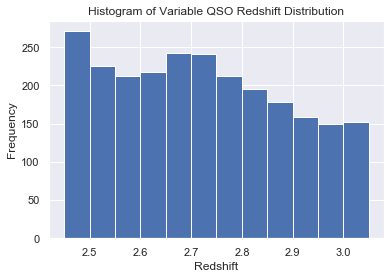

In [16]:
a,b,c = plt.hist(np.asarray(var_qso_z), bins = 12)
plt.title('Histogram of Variable QSO Redshift Distribution')
plt.xlabel('Redshift')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

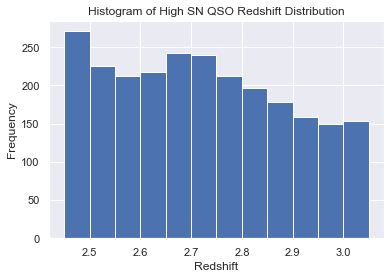

In [17]:
a,b,c = plt.hist(np.asarray(high_qso_z), bins = 12)
plt.title('Histogram of High SN QSO Redshift Distribution')
plt.xlabel('Redshift')
plt.ylabel('Frequency')

Text(0.5, 0, 'Redshift')

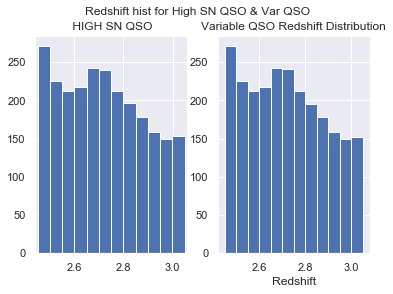

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Redshift hist for High SN QSO & Var QSO')

ax1.hist(np.asarray(high_qso_z), bins = 12)
ax1.set_xlim(2.44,3.06)
#ax1.set_ylim(0,185)
ax1.set_title(' HIGH SN QSO')

ax2.hist(np.asarray(var_qso_z), bins = 12)
#ax2.set_xlim(2.44,3.06)
#ax2.set_ylim(0,185)
ax2.set_title('Variable QSO Redshift Distribution')
ax2.set_xlabel('Redshift')

In [19]:
len(high_qso_z)

2459

In [20]:
len(var_qso_z)

2459

## Below this line is making SN dicts for the fake dict

In [21]:
def star_SN_data(data_dict):
    
    high_noise = []
    high_flux = []
    high_wave = []
    high_class = []
    high_redshift = []
    high_eboss_tgt = []
    
    low_noise = []
    low_flux = []
    low_wave = []
    low_class = []
    low_redshift = []
    low_eboss_tgt = []
    low_fake_noise = []
    
    for i in range(len(data_dict['CLASS'])):
        
        if data_dict['FAKE_NOISE'][i]  >= 12.:
            
            high_noise.append(data_dict['NOISE'][i])
            high_flux.append(data_dict['FLUX'][i])
            high_wave.append(data_dict['WAVE'][i])
            high_class.append(data_dict['CLASS'][i])
            high_redshift.append(data_dict['REDSHIFT'][i])
            #high_eboss_tgt.append(data_dict['EBOSS_TARGET1'][i])
            
        elif data_dict['FAKE_NOISE'][i] <= 2.:
            
            low_noise.append(data_dict['NOISE'][i])
            low_flux.append(data_dict['FLUX'][i])
            low_wave.append(data_dict['WAVE'][i])
            low_class.append(data_dict['CLASS'][i])
            low_redshift.append(data_dict['REDSHIFT'][i])
            low_fake_noise.append(data_dict['FAKE_NOISE'][i])
            #low_eboss_tgt.append(data_dict['EBOSS_TARGET1'][i])
            
    
    high_SN_dict = {'NOISE': high_noise, 'FLUX': high_flux, 'WAVE': high_wave, 'CLASS': high_class,\
                   'REDSHIFT': high_redshift, 'EBOSS_TARGET1': high_eboss_tgt}
    
    low_SN_dict = {'NOISE': low_noise, 'FLUX': low_flux, 'WAVE': low_wave, 'CLASS': low_class,\
                  'REDSHIFT': low_redshift, 'EBOSS_TARGET1': low_eboss_tgt, 'FAKE_NOISE': low_fake_noise}
    
    SN_dict = {'HIGH': high_SN_dict, 'LOW': low_SN_dict}
    
    return SN_dict




def star_SN_fake_sel(data_dict1, data_dict2):
    
    dict1 = data_dict1
    dict2 = star_SN_data(data_dict2)

    
    high_SN2 = dict2['HIGH']
    low_SN2 = dict2['LOW']
    
        

    if (len(dict1['CLASS'])) > (len(low_SN2['CLASS'])):
        
        cut_low_SN1_class = np.asarray(dict1['CLASS'][:len(low_SN2['CLASS'])])
        cut_low_SN1_wave = np.asarray(dict1['WAVE'][:len(low_SN2['WAVE'])])
        cut_low_SN1_flux = np.asarray(dict1['FLUX'][:len(low_SN2['FLUX'])])
        cut_low_SN1_noise = np.asarray(dict1['NOISE'][:len(low_SN2['NOISE'])])
        cut_low_SN1_redshift = np.asarray(dict1['REDSHIFT'][:len(low_SN2['REDSHIFT'])])
        cut_low_SN1_fake_noise = np.asarray(dict1['FAKE_NOISE'][:len(low_SN2['FAKE_NOISE'])])
        
        cut_low_SN2_class = np.asarray(low_SN2['CLASS'])
        cut_low_SN2_wave = np.asarray(low_SN2['WAVE'])
        cut_low_SN2_flux = np.asarray(low_SN2['FLUX'])
        cut_low_SN2_noise = np.asarray(low_SN2['NOISE'])
        cut_low_SN2_redshift = np.asarray(low_SN2['REDSHIFT'])
        cut_low_SN2_fake_noise = np.asarray(low_SN2['FAKE_NOISE'])
        
        
    elif (len(dict1['CLASS'])) < (len(low_SN2['CLASS'])): 
        
        cut_low_SN1_class = dict1['CLASS']
        cut_low_SN1_wave = dict1['WAVE']
        cut_low_SN1_flux = dict1['FLUX']
        cut_low_SN1_noise = dict1['NOISE']
        cut_low_SN1_redshift = dict1['REDSHIFT']
        cut_low_SN1_fake_noise = dict1['FAKE_NOISE']
        
        cut_low_SN2_class = np.asarray(low_SN2['CLASS'][:len(dict1['CLASS'])])
        cut_low_SN2_wave = np.asarray(low_SN2['WAVE'][:len(dict1['WAVE'])])
        cut_low_SN2_flux = np.asarray(low_SN2['FLUX'][:len(dict1['FLUX'])])
        cut_low_SN2_noise = np.asarray(low_SN2['NOISE'][:len(dict1['NOISE'])])
        cut_low_SN2_redshift = np.asarray(low_SN2['REDSHIFT'][:len(dict1['REDSHIFT'])])
        cut_low_SN2_fake_noise = np.asarray(low_SN2['FAKE_NOISE'][:len(dict1['FAKE_NOISE'])])
        
    
    
    low_SN_class = np.concatenate((cut_low_SN1_class, cut_low_SN2_class))
    low_SN_wave = np.concatenate((cut_low_SN1_wave, cut_low_SN2_wave))
    low_SN_flux = np.concatenate((cut_low_SN1_flux, cut_low_SN2_flux))
    low_SN_noise = np.concatenate((cut_low_SN1_noise, cut_low_SN2_noise))
    low_SN_redshift = np.concatenate((cut_low_SN1_redshift, cut_low_SN2_redshift))
    low_SN_fake_noise = np.concatenate((cut_low_SN1_fake_noise, cut_low_SN2_fake_noise))
    
    
    low_SN_dict = {'CLASS': low_SN_class, 'WAVE': low_SN_wave, 'FLUX': low_SN_flux,\
                   'NOISE': low_SN_noise, 'REDSHIFT': low_SN_redshift, 'FAKE_NOISE': low_SN_fake_noise}

    SN_dicts = {'LOW': low_SN_dict}
    
    return SN_dicts


In [22]:
fake_dict = pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/object_dict/fake_dict")
star_fake_dict = pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/object_dict/fake_star_dict")

In [23]:
print(fake_dict.keys())
print(star_fake_dict.keys())

dict_keys(['FAKE_NOISE', 'NOISE', 'WAVE', 'REDSHIFT', 'FLUX', 'CLASS'])
dict_keys(['NOISE', 'WAVE', 'FLUX', 'CLASS', 'REDSHIFT', 'FAKE_NOISE'])


In [24]:
fake_star_dict = star_SN_fake_sel(fake_dict, star_fake_dict)

In [26]:
#pdb.pm()

In [27]:
save_as_pickled_object(fake_star_dict, "/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/joined_obj_dicts/fake_data_dict")

In [ ]:
len(fake_star_dict['LOW']['WAVE'][2])

In [ ]:
a,b,c = plt.hist(np.asarray(fake_star_dict['LOW']['CLASS']), bins = 10)

In [ ]:
len(var_star_dict['LOW']['WAVE'][6])

In [ ]:
fake_star_dict.keys()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(18, 4))
ax1.hist(quasar_noise[arr_indx], bins = bin_list);
ax1.set_title('Low SN Variable QSO Noise Distribution', fontsize=18);
ax1.set_xlabel('Noise')
ax1.set_ylabel('Number per bin')
#ax1.set_xlim(0,2)

ax2.hist(np.asarray(new_noise), bins = bin_list)
ax2.set_title('Fake low SN Noise Model Noise Distributtion', fontsize=18);
ax2.set_xlabel('Noise')
ax2.set_ylabel('Number per bin')
ax2.set_ylim(0,400)

In [ ]:
class_labels = np.asarray(var_star_dict['LOW']['CLASS'])
quasar_noise = np.asarray(var_star_dict['LOW']['NOISE'])
arr_indx = np.where(class_labels == 'QSO')



fake_labels = bal_fake_dict['LOW']['CLASS']
new_noise = []

for i in range(len(fake_labels)):
    
    if fake_labels[i] == 'QSO':
        
        new_noise.append(np.mean(bal_fake_dict['LOW']['FLUX'][i])\
                     /(np.std(bal_fake_dict['LOW']['FLUX'][i])))

In [ ]:
bin_list = [0, .2, .4, .6, .8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.]